<a href="https://colab.research.google.com/github/Eliandry/Neural-networks/blob/main/predict_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.optimizers import Adam

In [73]:
company='HPQ'
start_time=dt.datetime(2012,1,1)
end=dt.datetime(2021,1,1)

data=web.DataReader(company,'yahoo',start_time,end)
print(data)

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2012-01-03  12.184378  11.952770  11.952770  12.089010  29487863.0   9.347036
2012-01-04  12.170754  12.007266  12.043597  12.079927  24478313.0   9.340011
2012-01-05  12.075386  11.920981  11.952770  12.034514  30491094.0   9.304898
2012-01-06  12.084469  11.943688  12.066303  11.989101  25775951.0   9.269787
2012-01-09  12.084469  11.957312  11.984559  12.007266  24350597.0   9.283834
...               ...        ...        ...        ...         ...        ...
2020-12-24  24.450001  24.160000  24.330000  24.260000   2309800.0  24.260000
2020-12-28  24.629999  24.250000  24.309999  24.270000   5592900.0  24.270000
2020-12-29  24.430000  23.969999  24.270000  24.049999   5831200.0  24.049999
2020-12-30  24.690001  24.200001  24.200001  24.320000   7556300.0  24.320000
2020-12-31  24.690001  24.230000  24.340000  24.590000   6368200

In [74]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Adj Close'].values.reshape(-1,1))

In [75]:
pred=60
x_train=[]
y_train=[]
for x in range(pred,len(scaled_data)):
  x_train.append(scaled_data[x-pred:x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [76]:
model=Sequential()
model.add(LSTM(units=60, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [77]:
model.compile(loss='mean_squared_error',optimizer=Adam(0.01))
model.fit(x_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
69/69 [==============================] - 11s 90ms/step - loss: 0.1343
Epoch 2/30
69/69 [==============================] - 6s 90ms/step - loss: 0.0038
Epoch 3/30
69/69 [==============================] - 6s 91ms/step - loss: 0.0034
Epoch 4/30
69/69 [==============================] - 6s 89ms/step - loss: 0.0028
Epoch 5/30
69/69 [==============================] - 6s 92ms/step - loss: 0.0029
Epoch 6/30
69/69 [==============================] - 6s 91ms/step - loss: 0.0023
Epoch 7/30
69/69 [==============================] - 6s 91ms/step - loss: 0.0024
Epoch 8/30
69/69 [==============================] - 6s 91ms/step - loss: 0.0021
Epoch 9/30
69/69 [==============================] - 6s 92ms/step - loss: 0.0019
Epoch 10/30
69/69 [==============================] - 6s 92ms/step - loss: 0.0022
Epoch 11/30
69/69 [==============================] - 6s 92ms/step - loss: 0.0019
Epoch 12/30
69/69 [==============================] - 6s 92ms/step - loss: 0.0016
Epoch 13/30
69/69 [=================

In [78]:
test_start=dt.datetime(2020,1,1)
test_end=dt.datetime.now()
test_data=web.DataReader(company,'yahoo',test_start,test_end)
actual=test_data['Adj Close'].values
total=pd.concat((data['Adj Close'],test_data['Adj Close']),axis=0)

inp=total[len(total)-len(test_data)-pred:].values
inp= inp.reshape(-1,1)
inp=scaler.transform(inp)


x_test=[]

for x in range(pred,len(inp)):
  x_test.append(inp[x-pred:x,0])


x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

pred_prices=model.predict(x_test)
pred_prices=scaler.inverse_transform(pred_prices)


No handles with labels found to put in legend.


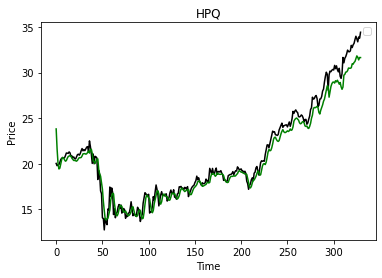

In [79]:
plt.plot(actual,color='black')
plt.plot(pred_prices,color='green')
plt.title(f'{company}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [80]:
real=[inp[len(inp)+1-pred:len(inp+1),0]]
real=np.array(real)
real=np.reshape(real,(real.shape[0],real.shape[1],1))

print(scaler.inverse_transform(real[-1]))

[[24.34000015]
 [24.47999954]
 [24.88999939]
 [25.22999954]
 [25.95000076]
 [26.14999962]
 [27.29999924]
 [27.09000015]
 [27.14999962]
 [27.37999916]
 [27.48999977]
 [27.15999985]
 [26.28000069]
 [26.40999985]
 [27.10000038]
 [27.12000084]
 [27.37999916]
 [27.96999931]
 [28.19000053]
 [28.96999931]
 [29.57999992]
 [30.04000092]
 [29.81999969]
 [28.06999969]
 [29.75      ]
 [30.15999985]
 [30.10000038]
 [30.26000023]
 [30.34000015]
 [30.28000069]
 [30.79000092]
 [30.43000031]
 [30.73999977]
 [30.30999947]
 [30.07999992]
 [30.46999931]
 [29.57999992]
 [29.37000084]
 [29.88999939]
 [31.65999985]
 [31.06999969]
 [31.55999947]
 [31.75      ]
 [32.04999924]
 [32.45999908]
 [32.29000092]
 [32.27999878]
 [32.38000107]
 [32.97999954]
 [32.74000168]
 [33.04000092]
 [33.20000076]
 [33.61999893]
 [33.97999954]
 [33.70000076]
 [33.36999893]
 [33.90000153]
 [33.77000046]
 [34.41999817]]


In [81]:
prediction=model.predict(real)
prediction=scaler.inverse_transform(prediction)
print(prediction)

[[32.150913]]
